In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Supervised Learning/csv files/hearing_test.csv')

In [4]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


###from this visualization we can see that ppl with higher age group are more prone to fail the test

### Note:- for a categorical column we should use box plot


<Axes: xlabel='test_result', ylabel='physical_score'>

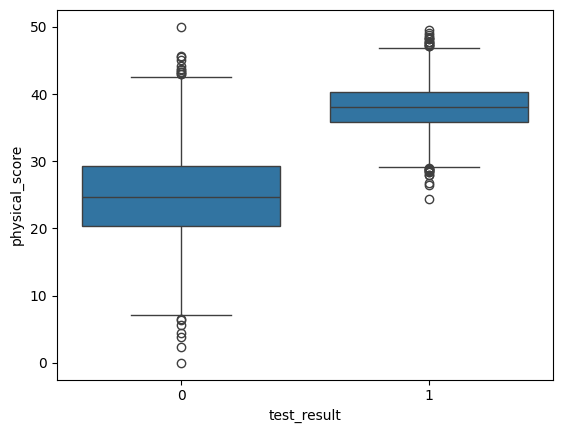

In [5]:
sns.boxplot(y='physical_score',x='test_result',data=df)

###from this visualization we can see that ppl with higher physical score are more prone to pass the test

<Axes: xlabel='age', ylabel='physical_score'>

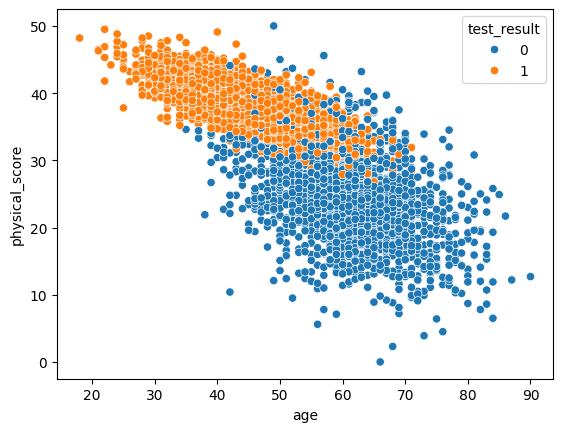

In [6]:
sns.scatterplot(y='physical_score',x='age',data=df,hue='test_result')

###observation :- As ppl grows older , their physical score goes down , so we have a negative correlation here

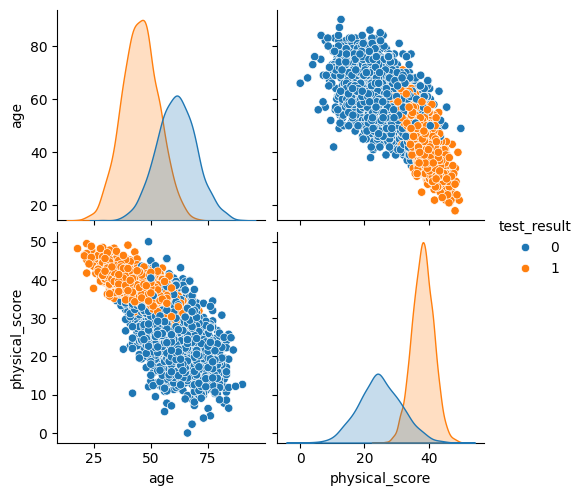

In [7]:
sns.pairplot(data=df,hue='test_result')

####our data has very less overlapping that means our model should give very good results for this

In [8]:
df.corr() #negative correlation as expected

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


#Train | Test | Split

In [9]:
X = df.drop('test_result',axis= 1)
Y = df['test_result']


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=51)

####Now we will scale and fit the training data at the same time

In [12]:
sc = StandardScaler()


In [13]:
sc_X_train = sc.fit_transform(X_train) #scaling and training model on the train data
sc_X_test = sc.transform(X_test) #scaling test data

#Logistic Regression Model

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
log_model = LogisticRegression()

In [16]:
log_model.fit(sc_X_train,Y_train)

LogisticRegression()

In [17]:
log_model.predict(sc_X_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,

In [27]:
y_proba = log_model.predict_proba(sc_X_test) #probability of belinging to class 1

In [19]:
log_model.coef_

array([[-0.84489277,  3.52362969]])

#Model Performance


In [32]:
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix , RocCurveDisplay

In [21]:
y_pred = log_model.predict(sc_X_test)

In [22]:
accuracy_score(y_pred,Y_test) #accuracy of model is 91%

0.91

In [23]:
confusion_matrix(y_pred,Y_test)

array([[350,  32],
       [ 58, 560]])

In [24]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       382
           1       0.95      0.91      0.93       618

    accuracy                           0.91      1000
   macro avg       0.90      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



Testing with external example

In [25]:
log_model.predict_proba(sc.transform([[50,32],[32,54]])) #better accuracy than bayes classifier i am getting

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[4.23417997e-01, 5.76582003e-01],
       [1.46822576e-05, 9.99985318e-01]])

In [26]:
from sklearn import metrics

In [29]:
y_score = y_proba[:,1]
metrics.roc_curve

<function sklearn.metrics._ranking.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)>

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


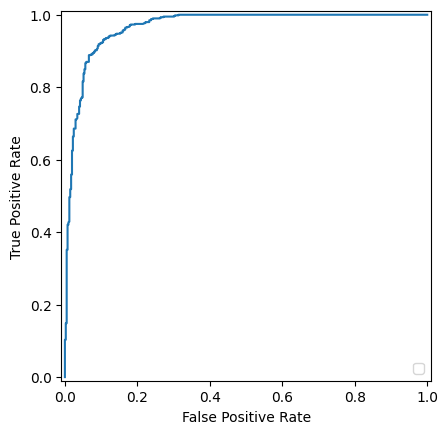

In [35]:
fpr,tpr,threshold = metrics.roc_curve(Y_test,y_score)
RocCurveDisplay(fpr = fpr,tpr = tpr).plot()